In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# lda = LinearDiscriminantAnalysis().fit(X, y)

- `lda.predict(X)`: Performs multi-class classification. This will assign new data points to the available classes.
- `lda.transform(X)`: Performs dimensionality reduction in classification datasets while maximizing the separation of classes. This will find a linear combination of input features in a lower dimensional space. When lda is used in this way, it acts as a data preprocessing step in which its output is used as the input of another classification algorithm such as a support vector machine or logistic regression!

# PCA vs LDA

- PCA performs dimensionality reduction by maximizing the variance of the data. Therefore, in most cases, feature standardization is necessary before applying PCA. LDA performs dimensionality reduction by maximizing the class separability of classification datasets. Therefore, feature standardization is optional here 
- PCA does not require class labels. So, it can be used with classification, regression and even with unlabeled data! LDA reqiuress class labels. So, it is used with classification datasets.
- PCA finds a set of uncorrelated features in a lower dimensional space. Therefore, PCA automatically removes multicollinearity in the data.
- LDA can be used for both supervised and unsupervised tasks. PCA can only be used for unsupervised dimensionality reduction.
- The maximum number of components that PCA can find is equal to the number of input features (original dimensionality) of the dataset! We often prefer to find a considerably low number of components that captures as much of the variance in the original data as possible. The maximum number of components that LDA can find is equal to the number of classes minus one in the classification dataset. For example, if there are only 3 classes in the dataset, LDA can find the maximum of 2 components.
- LDA is more effective than PCA for classification datasets because LDA reduces the dimensionality of the data by maximizing class separability. It is easier to draw decision boundaries for data with maximum class separability.

# The Wine dataset

In [3]:
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()
X = wine.data
y = wine.target

print("Wine dataset size:", X.shape)

Wine dataset size: (178, 13)


# Apply PCA to the Wine data

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
X_scaled = StandardScaler().fit_transform(X)

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

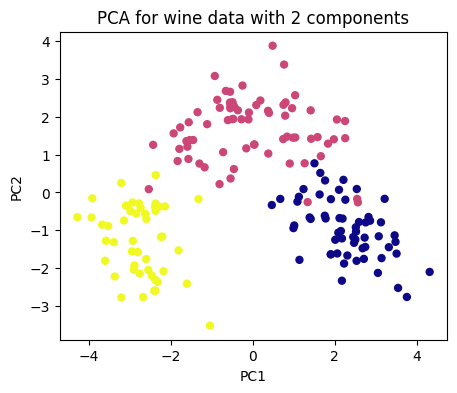

In [8]:
plt.figure(figsize=[5, 4])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=25, cmap="plasma")
plt.title("PCA for wine data with 2 components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show();

The data appears to be linearly separable with linear decision boundaries (i.e. straight lines). However, some data points would be misclassified. Classes have not been well separated since PCA doesn’t maximize class separability.

When applying PCA to the Wine data by keeping only two components, we lost a significant amount of variance in the data.

In [9]:
exp_var = sum(pca.explained_variance_ratio_ * 100)
print("Variance explained:", exp_var)

Variance explained: 55.406338356935265


Only about 55.4% of the variance was captured by our PCA model with two components. That much of variance is not good enough to accurately represent the original data.

Let’s find the optimal number of principal components for the Wine data by creating the following plot. The value should be greater than 2 but less than 13 (number of input features).

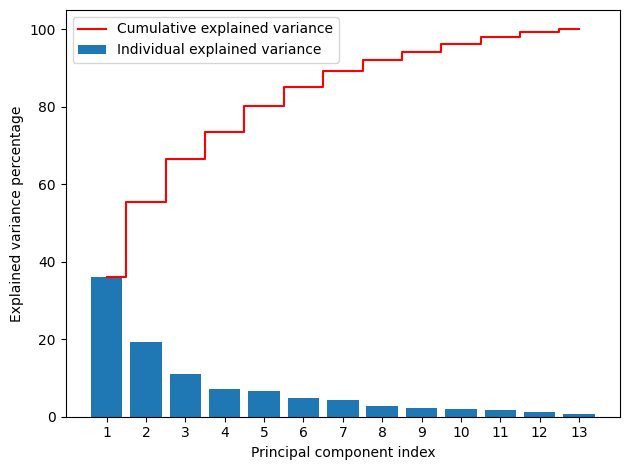

In [10]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 14), exp_var, align="center", label="Individual explained variance")

plt.step(
    range(1, 14),
    cum_exp_var,
    where="mid",
    label="Cumulative explained variance",
    color="red",
)

plt.ylabel("Explained variance percentage")
plt.xlabel("Principal component index")
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc="best")
plt.tight_layout()

plt.show();

The first six or seven components capture about 85–90% of the variance in the data. So, they will accurately represent the original Wine data. But, for a 2D visualization, we strictly want to use only two components even though they don’t capture much of the variance in the data.

# Apply LDA to the Wine data

### Feature standardization

Feature standardization is not needed for LDA as it does not have any effect on the performance of the LDA model.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

Note that for LDA, class labels (y) are also needed in the `fit_transform()`method.

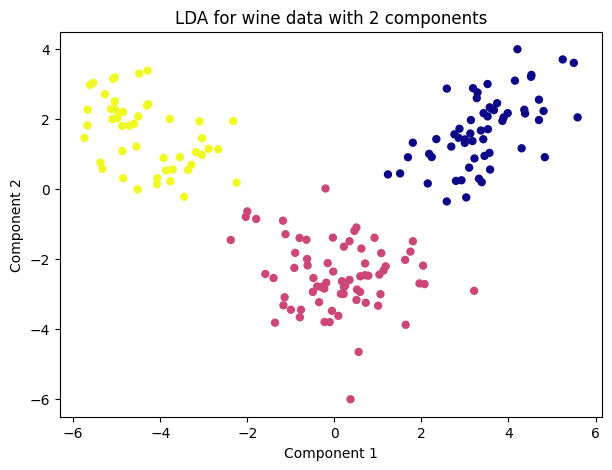

In [13]:
plt.figure(figsize=[7, 5])

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, s=25, cmap='plasma')
plt.title('LDA for wine data with 2 components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show();

Now, the classes have been clearly separated since LDA maximizes class separability in addition to reducing dimensionality. The data points will not be misclassified when drawing linear decision boundaries.

The maximum number of components that LDA can keep for Wine data is also two because there are only three classes in the data. So, these two components should capture all the variance in the data.

Let’s verify this numerically and visually!

In [14]:
exp_var = sum(lda.explained_variance_ratio_ * 100)
print('Variance explained:', exp_var)

Variance explained: 100.0


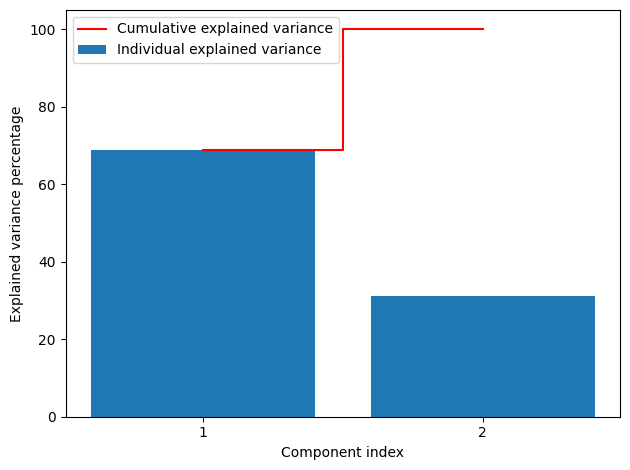

In [15]:
lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit(X, y)

exp_var = lda.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 3), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 3), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Component index')
plt.xticks(ticks=[1, 2])
plt.legend(loc='best')
plt.tight_layout()

plt.show();

The first two components capture all the variance in the data. So, they fully represent the original Wine data.

# The benefits of the LDA model

Our LDA model has the following benefits.

- Reducing the dimensionality (number of features) in the data
- Visualizing high-dimensional data in a 2D plot
- Maximizing class separability

# SVM with LDA

Only the LDA can maximize class separability while reducing the dimensionality of the data. So, LDA is ideal for reducing dimensionality before running another classification algorithm such as a support vector machine (SVM) or logistic regression.

<img src="lds_svm.png" style="width:600px;height:150px;background-color:white">

The LDA model takes high-dimensional (13-dim) Wine data (X) as its input and reduces the dimensionality of the data while maximizing class separability. The transformed data (2-dim) which is X_LDA is used as the input of the SVM model along with the class labels, y. Then, the SVM performs multi-class classification since Wine data has 3 classes by using the One-vs-Rest (‘ovr’) strategy which will allow the algorithm to draw decision boundaries for each class considering all other classes.

We use the ‘linear’ kernel as the kernel of the support vector machine algorithm because the data appears to be linearly separable with linear decision boundaries (i.e. straight lines).

In [16]:
from sklearn.svm import SVC

In [17]:
X_lda = lda.fit_transform(X, y)

In [18]:
svc = SVC(kernel='linear', decision_function_shape='ovr')
svc.fit(X_lda, y)

SVC(kernel='linear')

So, LDA is highly effective than PCA for dimensionality reduction in classification datasets because LDA maximizes class separability while reducing the dimensionality of the data.

# Choosing the right number of components for LDA

The most important hyperparameter in both PCA and LDA algorithms is `n_components` in which we specify the number of components that LDA or PCA should find.

- If the sole purpose of applying LDA is for data visualization, you should keep 2 (for 2D plots) or 3 (for 3D plots) components. We are only familiar with 2D and 3D plots and we can’t imagine other high-dimensional plots.
- As I explained earlier, the cumulative explained variance plot is extremely useful to choose the right number of components.
- The maximum number of components that LDA can find is equal to the number of classes minus one in the classification dataset.